In [1]:
import gensim 
import logging
import os
import pickle
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot


logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [4]:
data_file="data/europarl/training.en"

In [2]:
def get_words(filename):
        porter = PorterStemmer()
        stop_words = set(stopwords.words("english"))
        input_file = open(filename) 

        sentences = []
        
        for ind_, line in enumerate(input_file):
            
            tokens = word_tokenize(line)
            
            # Filterout Punctuation and Stopwords
            line = [word.lower() for word in tokens if word.isalpha() if word not in stop_words]
            yield line


In [3]:
if not os.path.isfile(os.path.join("data", "data.txt")): 
    data = list(get_words(data_file))
    with open(os.path.join("data", "data.txt"), "wb") as fp:   #Pickling
        pickle.dump(data, fp)
else:
    with open(os.path.join("data", "data.txt"), "rb") as fp:   # Unpickling
        data = pickle.load(fp)
    

In [36]:
n_epochs=20
neg_samples = 10
win_size = 5
embed_size =300

In [37]:
model = gensim.models.Word2Vec (data, size=embed_size, window=win_size, min_count=5, sg=1, negative = neg_samples, workers=5)
model.train(data, total_examples=len(data), epochs=n_epochs)
if not os.path.isdir("model"):
    os.makedirs("model")
model.save(os.path.join('model', str(embed_size)+"_"+str(neg_samples)+"_"+str(n_epochs)+"_skip.bin"))

2018-05-31 10:43:09,078 : INFO : collecting all words and their counts
2018-05-31 10:43:09,079 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-31 10:43:09,102 : INFO : PROGRESS: at sentence #10000, processed 121592 words, keeping 12933 word types
2018-05-31 10:43:09,129 : INFO : PROGRESS: at sentence #20000, processed 242840 words, keeping 17715 word types
2018-05-31 10:43:09,161 : INFO : PROGRESS: at sentence #30000, processed 364398 words, keeping 21062 word types
2018-05-31 10:43:09,178 : INFO : PROGRESS: at sentence #40000, processed 486334 words, keeping 23696 word types
2018-05-31 10:43:09,201 : INFO : PROGRESS: at sentence #50000, processed 607931 words, keeping 25992 word types
2018-05-31 10:43:09,222 : INFO : PROGRESS: at sentence #60000, processed 729209 words, keeping 27874 word types
2018-05-31 10:43:09,246 : INFO : PROGRESS: at sentence #70000, processed 850375 words, keeping 29620 word types
2018-05-31 10:43:09,271 : INFO : PROGRESS: at 

2018-05-31 10:43:10,817 : INFO : PROGRESS: at sentence #720000, processed 8747349 words, keeping 68743 word types
2018-05-31 10:43:10,842 : INFO : PROGRESS: at sentence #730000, processed 8868798 words, keeping 69086 word types
2018-05-31 10:43:10,861 : INFO : PROGRESS: at sentence #740000, processed 8990584 words, keeping 69383 word types
2018-05-31 10:43:10,882 : INFO : PROGRESS: at sentence #750000, processed 9111814 words, keeping 69714 word types
2018-05-31 10:43:10,902 : INFO : PROGRESS: at sentence #760000, processed 9232915 words, keeping 70047 word types
2018-05-31 10:43:10,927 : INFO : PROGRESS: at sentence #770000, processed 9355001 words, keeping 70364 word types
2018-05-31 10:43:10,946 : INFO : PROGRESS: at sentence #780000, processed 9476762 words, keeping 70695 word types
2018-05-31 10:43:10,971 : INFO : PROGRESS: at sentence #790000, processed 9597835 words, keeping 71018 word types
2018-05-31 10:43:10,990 : INFO : PROGRESS: at sentence #800000, processed 9719161 words,

2018-05-31 10:43:12,406 : INFO : PROGRESS: at sentence #1430000, processed 17372063 words, keeping 87274 word types
2018-05-31 10:43:12,438 : INFO : PROGRESS: at sentence #1440000, processed 17492934 words, keeping 87504 word types
2018-05-31 10:43:12,460 : INFO : PROGRESS: at sentence #1450000, processed 17615276 words, keeping 87738 word types
2018-05-31 10:43:12,479 : INFO : PROGRESS: at sentence #1460000, processed 17738104 words, keeping 87943 word types
2018-05-31 10:43:12,504 : INFO : PROGRESS: at sentence #1470000, processed 17859045 words, keeping 88157 word types
2018-05-31 10:43:12,523 : INFO : PROGRESS: at sentence #1480000, processed 17980812 words, keeping 88370 word types
2018-05-31 10:43:12,543 : INFO : PROGRESS: at sentence #1490000, processed 18101987 words, keeping 88555 word types
2018-05-31 10:43:12,562 : INFO : PROGRESS: at sentence #1500000, processed 18221881 words, keeping 88782 word types
2018-05-31 10:43:12,583 : INFO : PROGRESS: at sentence #1510000, process

2018-05-31 10:43:13,921 : INFO : PROGRESS: at sentence #2140000, processed 26001617 words, keeping 100326 word types
2018-05-31 10:43:13,943 : INFO : PROGRESS: at sentence #2150000, processed 26122295 words, keeping 100492 word types
2018-05-31 10:43:13,966 : INFO : PROGRESS: at sentence #2160000, processed 26243750 words, keeping 100657 word types
2018-05-31 10:43:13,986 : INFO : PROGRESS: at sentence #2170000, processed 26364939 words, keeping 100786 word types
2018-05-31 10:43:14,006 : INFO : PROGRESS: at sentence #2180000, processed 26485355 words, keeping 100942 word types
2018-05-31 10:43:14,025 : INFO : PROGRESS: at sentence #2190000, processed 26606271 words, keeping 101100 word types
2018-05-31 10:43:14,047 : INFO : PROGRESS: at sentence #2200000, processed 26727451 words, keeping 101278 word types
2018-05-31 10:43:14,065 : INFO : PROGRESS: at sentence #2210000, processed 26849134 words, keeping 101457 word types
2018-05-31 10:43:14,092 : INFO : PROGRESS: at sentence #2220000,

2018-05-31 10:44:11,060 : INFO : EPOCH 1 - PROGRESS: at 52.77% examples, 246400 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:44:12,073 : INFO : EPOCH 1 - PROGRESS: at 53.72% examples, 246394 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:44:13,079 : INFO : EPOCH 1 - PROGRESS: at 54.74% examples, 246746 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:44:14,100 : INFO : EPOCH 1 - PROGRESS: at 55.75% examples, 247024 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:44:15,102 : INFO : EPOCH 1 - PROGRESS: at 56.74% examples, 247213 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:44:16,194 : INFO : EPOCH 1 - PROGRESS: at 57.80% examples, 247343 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:44:17,201 : INFO : EPOCH 1 - PROGRESS: at 58.87% examples, 247806 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:44:18,223 : INFO : EPOCH 1 - PROGRESS: at 59.86% examples, 247896 words/s, in_qsize 8, out_qsize 1
2018-05-31 10:44:19,236 : INFO : EPOCH 1 - PROGRESS: at 60.86% examples, 248014 words/s, in_qsiz

2018-05-31 10:45:21,122 : INFO : EPOCH 2 - PROGRESS: at 22.32% examples, 259247 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:45:22,184 : INFO : EPOCH 2 - PROGRESS: at 23.35% examples, 258947 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:45:23,191 : INFO : EPOCH 2 - PROGRESS: at 24.38% examples, 259258 words/s, in_qsize 10, out_qsize 0
2018-05-31 10:45:24,199 : INFO : EPOCH 2 - PROGRESS: at 25.37% examples, 259166 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:45:25,214 : INFO : EPOCH 2 - PROGRESS: at 26.39% examples, 259376 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:45:26,240 : INFO : EPOCH 2 - PROGRESS: at 27.45% examples, 259799 words/s, in_qsize 10, out_qsize 0
2018-05-31 10:45:27,272 : INFO : EPOCH 2 - PROGRESS: at 28.44% examples, 259485 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:45:28,305 : INFO : EPOCH 2 - PROGRESS: at 29.46% examples, 259496 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:45:29,308 : INFO : EPOCH 2 - PROGRESS: at 30.42% examples, 259130 words/s, in_qs

2018-05-31 10:46:36,261 : INFO : EPOCH 2 - PROGRESS: at 96.98% examples, 260099 words/s, in_qsize 10, out_qsize 0
2018-05-31 10:46:37,333 : INFO : EPOCH 2 - PROGRESS: at 98.05% examples, 260092 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:46:38,341 : INFO : EPOCH 2 - PROGRESS: at 99.07% examples, 260156 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:46:39,117 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-05-31 10:46:39,170 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-05-31 10:46:39,197 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-05-31 10:46:39,201 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-05-31 10:46:39,229 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-05-31 10:46:39,230 : INFO : EPOCH - 2 : training on 27325122 raw words (26212013 effective words) took 100.7s, 260293 effective words/s
2018-05-31 10:46:40,245 : INFO : EPOCH 3 - PROGRESS: at 0.92% ex

2018-05-31 10:47:47,349 : INFO : EPOCH 3 - PROGRESS: at 67.67% examples, 260338 words/s, in_qsize 8, out_qsize 1
2018-05-31 10:47:48,354 : INFO : EPOCH 3 - PROGRESS: at 68.69% examples, 260433 words/s, in_qsize 10, out_qsize 0
2018-05-31 10:47:49,368 : INFO : EPOCH 3 - PROGRESS: at 69.71% examples, 260498 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:47:50,429 : INFO : EPOCH 3 - PROGRESS: at 70.74% examples, 260382 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:47:51,477 : INFO : EPOCH 3 - PROGRESS: at 71.77% examples, 260321 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:47:52,498 : INFO : EPOCH 3 - PROGRESS: at 72.83% examples, 260487 words/s, in_qsize 10, out_qsize 0
2018-05-31 10:47:53,499 : INFO : EPOCH 3 - PROGRESS: at 73.82% examples, 260463 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:47:54,500 : INFO : EPOCH 3 - PROGRESS: at 74.80% examples, 260436 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:47:55,505 : INFO : EPOCH 3 - PROGRESS: at 75.82% examples, 260521 words/s, in_qs

2018-05-31 10:48:57,507 : INFO : EPOCH 4 - PROGRESS: at 37.41% examples, 260037 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:48:58,514 : INFO : EPOCH 4 - PROGRESS: at 38.43% examples, 260207 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:48:59,515 : INFO : EPOCH 4 - PROGRESS: at 39.42% examples, 260160 words/s, in_qsize 10, out_qsize 0
2018-05-31 10:49:00,538 : INFO : EPOCH 4 - PROGRESS: at 40.40% examples, 259987 words/s, in_qsize 8, out_qsize 1
2018-05-31 10:49:01,554 : INFO : EPOCH 4 - PROGRESS: at 41.43% examples, 260079 words/s, in_qsize 10, out_qsize 0
2018-05-31 10:49:02,594 : INFO : EPOCH 4 - PROGRESS: at 42.50% examples, 260258 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:49:03,615 : INFO : EPOCH 4 - PROGRESS: at 43.51% examples, 260322 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:49:04,651 : INFO : EPOCH 4 - PROGRESS: at 44.49% examples, 260078 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:49:05,681 : INFO : EPOCH 4 - PROGRESS: at 45.52% examples, 260087 words/s, in_qs

2018-05-31 10:50:07,794 : INFO : EPOCH 5 - PROGRESS: at 6.99% examples, 255988 words/s, in_qsize 10, out_qsize 0
2018-05-31 10:50:08,819 : INFO : EPOCH 5 - PROGRESS: at 7.98% examples, 255526 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:50:09,848 : INFO : EPOCH 5 - PROGRESS: at 9.00% examples, 256098 words/s, in_qsize 10, out_qsize 1
2018-05-31 10:50:10,860 : INFO : EPOCH 5 - PROGRESS: at 10.02% examples, 256993 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:50:11,917 : INFO : EPOCH 5 - PROGRESS: at 11.04% examples, 256680 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:50:12,919 : INFO : EPOCH 5 - PROGRESS: at 12.03% examples, 256803 words/s, in_qsize 10, out_qsize 0
2018-05-31 10:50:13,934 : INFO : EPOCH 5 - PROGRESS: at 13.01% examples, 256670 words/s, in_qsize 10, out_qsize 0
2018-05-31 10:50:14,951 : INFO : EPOCH 5 - PROGRESS: at 14.07% examples, 257847 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:50:15,960 : INFO : EPOCH 5 - PROGRESS: at 15.02% examples, 257149 words/s, in_qsi

2018-05-31 10:51:22,444 : INFO : EPOCH 5 - PROGRESS: at 80.57% examples, 258128 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:51:23,448 : INFO : EPOCH 5 - PROGRESS: at 81.52% examples, 258013 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:51:24,458 : INFO : EPOCH 5 - PROGRESS: at 82.50% examples, 257992 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:51:25,504 : INFO : EPOCH 5 - PROGRESS: at 83.52% examples, 257976 words/s, in_qsize 10, out_qsize 0
2018-05-31 10:51:26,537 : INFO : EPOCH 5 - PROGRESS: at 84.51% examples, 257886 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:51:27,549 : INFO : EPOCH 5 - PROGRESS: at 85.53% examples, 257972 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:51:28,557 : INFO : EPOCH 5 - PROGRESS: at 86.49% examples, 257846 words/s, in_qsize 8, out_qsize 1
2018-05-31 10:51:29,583 : INFO : EPOCH 5 - PROGRESS: at 87.50% examples, 257887 words/s, in_qsize 10, out_qsize 1
2018-05-31 10:51:30,590 : INFO : EPOCH 5 - PROGRESS: at 88.49% examples, 257879 words/s, in_qs

2018-05-31 10:52:28,053 : INFO : EPOCH 1 - PROGRESS: at 44.53% examples, 255151 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:52:29,063 : INFO : EPOCH 1 - PROGRESS: at 45.52% examples, 255166 words/s, in_qsize 10, out_qsize 0
2018-05-31 10:52:30,077 : INFO : EPOCH 1 - PROGRESS: at 46.55% examples, 255366 words/s, in_qsize 10, out_qsize 0
2018-05-31 10:52:31,096 : INFO : EPOCH 1 - PROGRESS: at 47.50% examples, 255144 words/s, in_qsize 10, out_qsize 1
2018-05-31 10:52:32,125 : INFO : EPOCH 1 - PROGRESS: at 48.52% examples, 255267 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:52:33,132 : INFO : EPOCH 1 - PROGRESS: at 49.51% examples, 255295 words/s, in_qsize 10, out_qsize 0
2018-05-31 10:52:34,144 : INFO : EPOCH 1 - PROGRESS: at 50.50% examples, 255303 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:52:35,155 : INFO : EPOCH 1 - PROGRESS: at 51.45% examples, 255131 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:52:36,166 : INFO : EPOCH 1 - PROGRESS: at 52.44% examples, 255155 words/s, in_

2018-05-31 10:53:38,101 : INFO : EPOCH 2 - PROGRESS: at 12.75% examples, 253112 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:53:39,115 : INFO : EPOCH 2 - PROGRESS: at 13.71% examples, 252580 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:53:40,143 : INFO : EPOCH 2 - PROGRESS: at 14.72% examples, 253161 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:53:41,154 : INFO : EPOCH 2 - PROGRESS: at 15.70% examples, 253346 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:53:42,171 : INFO : EPOCH 2 - PROGRESS: at 16.69% examples, 253418 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:53:43,193 : INFO : EPOCH 2 - PROGRESS: at 17.71% examples, 253946 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:53:44,215 : INFO : EPOCH 2 - PROGRESS: at 18.69% examples, 253908 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:53:45,227 : INFO : EPOCH 2 - PROGRESS: at 19.68% examples, 253988 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:53:46,242 : INFO : EPOCH 2 - PROGRESS: at 20.67% examples, 254045 words/s, in_qsiz

2018-05-31 10:54:52,433 : INFO : EPOCH 2 - PROGRESS: at 85.24% examples, 255204 words/s, in_qsize 10, out_qsize 0
2018-05-31 10:54:53,440 : INFO : EPOCH 2 - PROGRESS: at 86.23% examples, 255223 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:54:54,444 : INFO : EPOCH 2 - PROGRESS: at 87.18% examples, 255146 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:54:55,469 : INFO : EPOCH 2 - PROGRESS: at 88.16% examples, 255115 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:54:56,483 : INFO : EPOCH 2 - PROGRESS: at 89.15% examples, 255118 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:54:57,519 : INFO : EPOCH 2 - PROGRESS: at 90.13% examples, 255058 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:54:58,524 : INFO : EPOCH 2 - PROGRESS: at 91.16% examples, 255184 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:54:59,534 : INFO : EPOCH 2 - PROGRESS: at 92.11% examples, 255094 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:55:00,551 : INFO : EPOCH 2 - PROGRESS: at 93.13% examples, 255186 words/s, in_qsi

2018-05-31 10:56:02,691 : INFO : EPOCH 3 - PROGRESS: at 53.57% examples, 254685 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:56:03,729 : INFO : EPOCH 3 - PROGRESS: at 54.56% examples, 254582 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:56:04,771 : INFO : EPOCH 3 - PROGRESS: at 55.57% examples, 254635 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:56:05,800 : INFO : EPOCH 3 - PROGRESS: at 56.56% examples, 254580 words/s, in_qsize 10, out_qsize 1
2018-05-31 10:56:06,820 : INFO : EPOCH 3 - PROGRESS: at 57.55% examples, 254566 words/s, in_qsize 10, out_qsize 0
2018-05-31 10:56:07,827 : INFO : EPOCH 3 - PROGRESS: at 58.58% examples, 254766 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:56:08,837 : INFO : EPOCH 3 - PROGRESS: at 59.53% examples, 254636 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:56:09,839 : INFO : EPOCH 3 - PROGRESS: at 60.56% examples, 254848 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:56:10,867 : INFO : EPOCH 3 - PROGRESS: at 61.52% examples, 254649 words/s, in_qs

2018-05-31 10:57:12,591 : INFO : EPOCH 4 - PROGRESS: at 21.73% examples, 254657 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:57:13,608 : INFO : EPOCH 4 - PROGRESS: at 22.69% examples, 254244 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:57:14,647 : INFO : EPOCH 4 - PROGRESS: at 23.71% examples, 254420 words/s, in_qsize 10, out_qsize 0
2018-05-31 10:57:15,659 : INFO : EPOCH 4 - PROGRESS: at 24.70% examples, 254475 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:57:16,697 : INFO : EPOCH 4 - PROGRESS: at 25.73% examples, 254651 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:57:17,698 : INFO : EPOCH 4 - PROGRESS: at 26.72% examples, 254792 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:57:18,705 : INFO : EPOCH 4 - PROGRESS: at 27.71% examples, 254872 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:57:19,712 : INFO : EPOCH 4 - PROGRESS: at 28.69% examples, 254941 words/s, in_qsize 10, out_qsize 0
2018-05-31 10:57:20,734 : INFO : EPOCH 4 - PROGRESS: at 29.68% examples, 254880 words/s, in_qs

2018-05-31 10:58:26,867 : INFO : EPOCH 4 - PROGRESS: at 94.16% examples, 255323 words/s, in_qsize 8, out_qsize 1
2018-05-31 10:58:27,882 : INFO : EPOCH 4 - PROGRESS: at 95.14% examples, 255316 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:58:28,901 : INFO : EPOCH 4 - PROGRESS: at 96.17% examples, 255401 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:58:29,915 : INFO : EPOCH 4 - PROGRESS: at 97.16% examples, 255399 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:58:31,014 : INFO : EPOCH 4 - PROGRESS: at 98.23% examples, 255371 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:58:32,031 : INFO : EPOCH 4 - PROGRESS: at 99.22% examples, 255361 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:58:32,657 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-05-31 10:58:32,685 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-05-31 10:58:32,738 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-05-31 10:58:32,745 : INFO : worker thread fi

2018-05-31 10:59:36,856 : INFO : EPOCH 5 - PROGRESS: at 62.43% examples, 255382 words/s, in_qsize 10, out_qsize 0
2018-05-31 10:59:37,864 : INFO : EPOCH 5 - PROGRESS: at 63.38% examples, 255255 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:59:38,884 : INFO : EPOCH 5 - PROGRESS: at 64.40% examples, 255374 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:59:39,896 : INFO : EPOCH 5 - PROGRESS: at 65.39% examples, 255376 words/s, in_qsize 10, out_qsize 0
2018-05-31 10:59:40,909 : INFO : EPOCH 5 - PROGRESS: at 66.37% examples, 255383 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:59:41,929 : INFO : EPOCH 5 - PROGRESS: at 67.37% examples, 255362 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:59:42,940 : INFO : EPOCH 5 - PROGRESS: at 68.36% examples, 255371 words/s, in_qsize 10, out_qsize 0
2018-05-31 10:59:43,945 : INFO : EPOCH 5 - PROGRESS: at 69.35% examples, 255404 words/s, in_qsize 9, out_qsize 0
2018-05-31 10:59:44,951 : INFO : EPOCH 5 - PROGRESS: at 70.33% examples, 255424 words/s, in_q

2018-05-31 11:00:46,986 : INFO : EPOCH 6 - PROGRESS: at 30.82% examples, 254904 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:00:48,071 : INFO : EPOCH 6 - PROGRESS: at 31.85% examples, 254657 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:00:49,110 : INFO : EPOCH 6 - PROGRESS: at 32.88% examples, 254774 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:00:50,120 : INFO : EPOCH 6 - PROGRESS: at 33.90% examples, 255085 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:00:51,124 : INFO : EPOCH 6 - PROGRESS: at 34.85% examples, 254889 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:00:52,133 : INFO : EPOCH 6 - PROGRESS: at 35.88% examples, 255197 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:00:53,149 : INFO : EPOCH 6 - PROGRESS: at 36.83% examples, 254932 words/s, in_qsize 8, out_qsize 1
2018-05-31 11:00:54,161 : INFO : EPOCH 6 - PROGRESS: at 37.85% examples, 255198 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:00:55,162 : INFO : EPOCH 6 - PROGRESS: at 38.83% examples, 255279 words/s, in_qs

2018-05-31 11:01:57,694 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-05-31 11:01:57,711 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-05-31 11:01:57,711 : INFO : EPOCH - 6 : training on 27325122 raw words (26210622 effective words) took 102.4s, 255900 effective words/s
2018-05-31 11:01:58,731 : INFO : EPOCH 7 - PROGRESS: at 0.88% examples, 227614 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:01:59,745 : INFO : EPOCH 7 - PROGRESS: at 1.83% examples, 236738 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:02:00,762 : INFO : EPOCH 7 - PROGRESS: at 2.85% examples, 245814 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:02:01,777 : INFO : EPOCH 7 - PROGRESS: at 3.84% examples, 248079 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:02:02,802 : INFO : EPOCH 7 - PROGRESS: at 4.87% examples, 250834 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:02:03,803 : INFO : EPOCH 7 - PROGRESS: at 5.82% examples, 250571 words/s, in_qsize 9, out_qsize 0
201

2018-05-31 11:03:09,763 : INFO : EPOCH 7 - PROGRESS: at 70.33% examples, 255840 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:03:10,803 : INFO : EPOCH 7 - PROGRESS: at 71.36% examples, 255874 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:03:11,811 : INFO : EPOCH 7 - PROGRESS: at 72.35% examples, 255886 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:03:12,818 : INFO : EPOCH 7 - PROGRESS: at 73.34% examples, 255900 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:03:13,826 : INFO : EPOCH 7 - PROGRESS: at 74.32% examples, 255911 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:03:14,832 : INFO : EPOCH 7 - PROGRESS: at 75.31% examples, 255928 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:03:15,857 : INFO : EPOCH 7 - PROGRESS: at 76.29% examples, 255884 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:03:16,863 : INFO : EPOCH 7 - PROGRESS: at 77.31% examples, 256021 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:03:17,865 : INFO : EPOCH 7 - PROGRESS: at 78.26% examples, 255927 words/s, in_q

2018-05-31 11:04:19,865 : INFO : EPOCH 8 - PROGRESS: at 38.76% examples, 255258 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:04:20,871 : INFO : EPOCH 8 - PROGRESS: at 39.74% examples, 255309 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:04:21,883 : INFO : EPOCH 8 - PROGRESS: at 40.73% examples, 255316 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:04:22,895 : INFO : EPOCH 8 - PROGRESS: at 41.72% examples, 255324 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:04:23,910 : INFO : EPOCH 8 - PROGRESS: at 42.71% examples, 255319 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:04:24,926 : INFO : EPOCH 8 - PROGRESS: at 43.69% examples, 255310 words/s, in_qsize 8, out_qsize 1
2018-05-31 11:04:25,937 : INFO : EPOCH 8 - PROGRESS: at 44.71% examples, 255533 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:04:26,954 : INFO : EPOCH 8 - PROGRESS: at 45.74% examples, 255707 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:04:27,961 : INFO : EPOCH 8 - PROGRESS: at 46.69% examples, 255535 words/s, in_q

2018-05-31 11:05:29,496 : INFO : EPOCH 9 - PROGRESS: at 6.88% examples, 252549 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:05:30,523 : INFO : EPOCH 9 - PROGRESS: at 7.90% examples, 253629 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:05:31,547 : INFO : EPOCH 9 - PROGRESS: at 8.89% examples, 253517 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:05:32,553 : INFO : EPOCH 9 - PROGRESS: at 9.91% examples, 254823 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:05:33,558 : INFO : EPOCH 9 - PROGRESS: at 10.86% examples, 254182 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:05:34,565 : INFO : EPOCH 9 - PROGRESS: at 11.88% examples, 255220 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:05:35,584 : INFO : EPOCH 9 - PROGRESS: at 12.82% examples, 254390 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:05:36,591 : INFO : EPOCH 9 - PROGRESS: at 13.85% examples, 255243 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:05:37,595 : INFO : EPOCH 9 - PROGRESS: at 14.80% examples, 254782 words/s, in_qsize 

2018-05-31 11:06:43,794 : INFO : EPOCH 9 - PROGRESS: at 79.47% examples, 255775 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:06:44,804 : INFO : EPOCH 9 - PROGRESS: at 80.42% examples, 255665 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:06:45,820 : INFO : EPOCH 9 - PROGRESS: at 81.45% examples, 255769 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:06:46,831 : INFO : EPOCH 9 - PROGRESS: at 82.43% examples, 255771 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:06:47,841 : INFO : EPOCH 9 - PROGRESS: at 83.45% examples, 255888 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:06:48,851 : INFO : EPOCH 9 - PROGRESS: at 84.40% examples, 255778 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:06:49,858 : INFO : EPOCH 9 - PROGRESS: at 85.39% examples, 255793 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:06:50,869 : INFO : EPOCH 9 - PROGRESS: at 86.37% examples, 255796 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:06:51,872 : INFO : EPOCH 9 - PROGRESS: at 87.36% examples, 255818 words/s, in_qs

2018-05-31 11:07:52,591 : INFO : EPOCH 10 - PROGRESS: at 46.73% examples, 255787 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:07:53,633 : INFO : EPOCH 10 - PROGRESS: at 47.75% examples, 255823 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:07:54,633 : INFO : EPOCH 10 - PROGRESS: at 48.78% examples, 256072 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:07:55,643 : INFO : EPOCH 10 - PROGRESS: at 49.73% examples, 255890 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:07:56,647 : INFO : EPOCH 10 - PROGRESS: at 50.75% examples, 256106 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:07:57,656 : INFO : EPOCH 10 - PROGRESS: at 51.70% examples, 255934 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:07:58,657 : INFO : EPOCH 10 - PROGRESS: at 52.69% examples, 255986 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:07:59,664 : INFO : EPOCH 10 - PROGRESS: at 53.72% examples, 256176 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:08:00,673 : INFO : EPOCH 10 - PROGRESS: at 54.66% examples, 256009 words/

2018-05-31 11:09:01,202 : INFO : EPOCH 11 - PROGRESS: at 13.92% examples, 255269 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:09:02,238 : INFO : EPOCH 11 - PROGRESS: at 14.91% examples, 254914 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:09:03,249 : INFO : EPOCH 11 - PROGRESS: at 15.92% examples, 255570 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:09:04,257 : INFO : EPOCH 11 - PROGRESS: at 16.87% examples, 255090 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:09:05,268 : INFO : EPOCH 11 - PROGRESS: at 17.86% examples, 255145 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:09:06,289 : INFO : EPOCH 11 - PROGRESS: at 18.84% examples, 255049 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:09:07,293 : INFO : EPOCH 11 - PROGRESS: at 19.83% examples, 255190 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:09:08,321 : INFO : EPOCH 11 - PROGRESS: at 20.85% examples, 255473 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:09:09,330 : INFO : EPOCH 11 - PROGRESS: at 21.84% examples, 255512 words

2018-05-31 11:10:14,638 : INFO : EPOCH 11 - PROGRESS: at 85.83% examples, 256402 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:10:15,682 : INFO : EPOCH 11 - PROGRESS: at 86.81% examples, 256301 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:10:16,709 : INFO : EPOCH 11 - PROGRESS: at 87.80% examples, 256249 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:10:17,730 : INFO : EPOCH 11 - PROGRESS: at 88.82% examples, 256322 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:10:18,742 : INFO : EPOCH 11 - PROGRESS: at 89.76% examples, 256209 words/s, in_qsize 8, out_qsize 1
2018-05-31 11:10:19,755 : INFO : EPOCH 11 - PROGRESS: at 90.79% examples, 256305 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:10:20,756 : INFO : EPOCH 11 - PROGRESS: at 91.74% examples, 256226 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:10:21,778 : INFO : EPOCH 11 - PROGRESS: at 92.77% examples, 256296 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:10:22,781 : INFO : EPOCH 11 - PROGRESS: at 93.76% examples, 256312 words

2018-05-31 11:11:23,254 : INFO : EPOCH 12 - PROGRESS: at 52.84% examples, 255650 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:11:24,263 : INFO : EPOCH 12 - PROGRESS: at 53.87% examples, 255841 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:11:25,263 : INFO : EPOCH 12 - PROGRESS: at 54.77% examples, 255552 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:11:26,289 : INFO : EPOCH 12 - PROGRESS: at 55.75% examples, 255492 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:11:27,328 : INFO : EPOCH 12 - PROGRESS: at 56.74% examples, 255378 words/s, in_qsize 8, out_qsize 1
2018-05-31 11:11:28,411 : INFO : EPOCH 12 - PROGRESS: at 57.76% examples, 255240 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:11:29,472 : INFO : EPOCH 12 - PROGRESS: at 58.65% examples, 254566 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:11:30,576 : INFO : EPOCH 12 - PROGRESS: at 59.61% examples, 254050 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:11:31,668 : INFO : EPOCH 12 - PROGRESS: at 60.49% examples, 253291 words/s

2018-05-31 11:12:32,490 : INFO : EPOCH 13 - PROGRESS: at 19.79% examples, 254042 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:12:33,495 : INFO : EPOCH 13 - PROGRESS: at 20.81% examples, 254635 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:12:34,504 : INFO : EPOCH 13 - PROGRESS: at 21.77% examples, 254295 words/s, in_qsize 8, out_qsize 1
2018-05-31 11:12:35,542 : INFO : EPOCH 13 - PROGRESS: at 22.80% examples, 254500 words/s, in_qsize 8, out_qsize 1
2018-05-31 11:12:36,556 : INFO : EPOCH 13 - PROGRESS: at 23.82% examples, 254921 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:12:37,567 : INFO : EPOCH 13 - PROGRESS: at 24.81% examples, 254960 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:12:38,621 : INFO : EPOCH 13 - PROGRESS: at 25.84% examples, 254951 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:12:39,624 : INFO : EPOCH 13 - PROGRESS: at 26.83% examples, 255073 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:12:40,662 : INFO : EPOCH 13 - PROGRESS: at 27.85% examples, 255197 words

2018-05-31 11:13:45,981 : INFO : EPOCH 13 - PROGRESS: at 91.74% examples, 255999 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:13:46,998 : INFO : EPOCH 13 - PROGRESS: at 92.77% examples, 256084 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:13:48,008 : INFO : EPOCH 13 - PROGRESS: at 93.72% examples, 255988 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:13:49,018 : INFO : EPOCH 13 - PROGRESS: at 94.74% examples, 256088 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:13:50,026 : INFO : EPOCH 13 - PROGRESS: at 95.69% examples, 256001 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:13:51,026 : INFO : EPOCH 13 - PROGRESS: at 96.69% examples, 256029 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:13:52,120 : INFO : EPOCH 13 - PROGRESS: at 97.75% examples, 256011 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:13:53,132 : INFO : EPOCH 13 - PROGRESS: at 98.77% examples, 256101 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:13:54,153 : INFO : EPOCH 13 - PROGRESS: at 99.72% examples, 255980 words

2018-05-31 11:14:54,254 : INFO : EPOCH 14 - PROGRESS: at 58.50% examples, 256060 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:14:55,260 : INFO : EPOCH 14 - PROGRESS: at 59.53% examples, 256238 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:14:56,266 : INFO : EPOCH 14 - PROGRESS: at 60.52% examples, 256252 words/s, in_qsize 8, out_qsize 1
2018-05-31 11:14:57,282 : INFO : EPOCH 14 - PROGRESS: at 61.52% examples, 256229 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:14:58,283 : INFO : EPOCH 14 - PROGRESS: at 62.50% examples, 256263 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:14:59,292 : INFO : EPOCH 14 - PROGRESS: at 63.45% examples, 256117 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:15:00,319 : INFO : EPOCH 14 - PROGRESS: at 64.47% examples, 256193 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:15:01,327 : INFO : EPOCH 14 - PROGRESS: at 65.42% examples, 256060 words/s, in_qsize 8, out_qsize 1
2018-05-31 11:15:02,335 : INFO : EPOCH 14 - PROGRESS: at 66.45% examples, 256216 words/

2018-05-31 11:16:03,315 : INFO : EPOCH 15 - PROGRESS: at 25.84% examples, 253248 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:16:04,321 : INFO : EPOCH 15 - PROGRESS: at 26.87% examples, 253739 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:16:05,326 : INFO : EPOCH 15 - PROGRESS: at 27.82% examples, 253533 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:16:06,328 : INFO : EPOCH 15 - PROGRESS: at 28.84% examples, 254015 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:16:07,356 : INFO : EPOCH 15 - PROGRESS: at 29.83% examples, 253941 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:16:08,406 : INFO : EPOCH 15 - PROGRESS: at 30.86% examples, 253996 words/s, in_qsize 8, out_qsize 1
2018-05-31 11:16:09,429 : INFO : EPOCH 15 - PROGRESS: at 31.85% examples, 253964 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:16:10,462 : INFO : EPOCH 15 - PROGRESS: at 32.88% examples, 254142 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:16:11,465 : INFO : EPOCH 15 - PROGRESS: at 33.86% examples, 254257 words

2018-05-31 11:17:16,241 : INFO : EPOCH 15 - PROGRESS: at 97.42% examples, 256146 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:17:17,248 : INFO : EPOCH 15 - PROGRESS: at 98.37% examples, 256061 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:17:18,320 : INFO : EPOCH 15 - PROGRESS: at 99.40% examples, 256000 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:17:18,769 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-05-31 11:17:18,802 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-05-31 11:17:18,823 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-05-31 11:17:18,841 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-05-31 11:17:18,852 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-05-31 11:17:18,852 : INFO : EPOCH - 15 : training on 27325122 raw words (26210593 effective words) took 102.3s, 256220 effective words/s
2018-05-31 11:17:19,885 : INFO : EPOCH 16 - PROGRESS: at 0.8

2018-05-31 11:18:24,877 : INFO : EPOCH 16 - PROGRESS: at 64.65% examples, 256696 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:18:25,879 : INFO : EPOCH 16 - PROGRESS: at 65.64% examples, 256720 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:18:26,924 : INFO : EPOCH 16 - PROGRESS: at 66.67% examples, 256726 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:18:27,930 : INFO : EPOCH 16 - PROGRESS: at 67.66% examples, 256734 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:18:28,938 : INFO : EPOCH 16 - PROGRESS: at 68.65% examples, 256734 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:18:29,963 : INFO : EPOCH 16 - PROGRESS: at 69.64% examples, 256673 words/s, in_qsize 10, out_qsize 1
2018-05-31 11:18:30,972 : INFO : EPOCH 16 - PROGRESS: at 70.67% examples, 256803 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:18:31,984 : INFO : EPOCH 16 - PROGRESS: at 71.66% examples, 256789 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:18:32,992 : INFO : EPOCH 16 - PROGRESS: at 72.65% examples, 256788 wor

2018-05-31 11:19:33,446 : INFO : EPOCH 17 - PROGRESS: at 31.82% examples, 255996 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:19:34,453 : INFO : EPOCH 17 - PROGRESS: at 32.84% examples, 256316 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:19:35,462 : INFO : EPOCH 17 - PROGRESS: at 33.83% examples, 256318 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:19:36,482 : INFO : EPOCH 17 - PROGRESS: at 34.81% examples, 256243 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:19:37,489 : INFO : EPOCH 17 - PROGRESS: at 35.80% examples, 256270 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:19:38,495 : INFO : EPOCH 17 - PROGRESS: at 36.79% examples, 256291 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:19:39,517 : INFO : EPOCH 17 - PROGRESS: at 37.77% examples, 256213 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:19:40,522 : INFO : EPOCH 17 - PROGRESS: at 38.80% examples, 256485 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:19:41,539 : INFO : EPOCH 17 - PROGRESS: at 39.74% examples, 256195 words/

2018-05-31 11:20:42,954 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-05-31 11:20:42,955 : INFO : EPOCH - 17 : training on 27325122 raw words (26210052 effective words) took 102.1s, 256748 effective words/s
2018-05-31 11:20:43,985 : INFO : EPOCH 18 - PROGRESS: at 0.84% examples, 217160 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:20:45,013 : INFO : EPOCH 18 - PROGRESS: at 1.86% examples, 239246 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:20:46,021 : INFO : EPOCH 18 - PROGRESS: at 2.89% examples, 248183 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:20:47,037 : INFO : EPOCH 18 - PROGRESS: at 3.84% examples, 247464 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:20:48,046 : INFO : EPOCH 18 - PROGRESS: at 4.87% examples, 251168 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:20:49,054 : INFO : EPOCH 18 - PROGRESS: at 5.82% examples, 250524 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:20:50,095 : INFO : EPOCH 18 - PROGRESS: at 6.85% examples, 251606 words/s,

2018-05-31 11:21:55,329 : INFO : EPOCH 18 - PROGRESS: at 70.78% examples, 256308 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:21:56,331 : INFO : EPOCH 18 - PROGRESS: at 71.73% examples, 256209 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:21:57,336 : INFO : EPOCH 18 - PROGRESS: at 72.72% examples, 256222 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:21:58,399 : INFO : EPOCH 18 - PROGRESS: at 73.75% examples, 256168 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:21:59,405 : INFO : EPOCH 18 - PROGRESS: at 74.76% examples, 256309 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:22:00,409 : INFO : EPOCH 18 - PROGRESS: at 75.71% examples, 256202 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:22:01,412 : INFO : EPOCH 18 - PROGRESS: at 76.72% examples, 256345 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:22:02,436 : INFO : EPOCH 18 - PROGRESS: at 77.67% examples, 256177 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:22:03,465 : INFO : EPOCH 18 - PROGRESS: at 78.66% examples, 256115 words/s

2018-05-31 11:23:03,813 : INFO : EPOCH 19 - PROGRESS: at 37.70% examples, 255694 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:23:04,830 : INFO : EPOCH 19 - PROGRESS: at 38.72% examples, 255899 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:23:05,838 : INFO : EPOCH 19 - PROGRESS: at 39.71% examples, 255921 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:23:06,841 : INFO : EPOCH 19 - PROGRESS: at 40.70% examples, 255971 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:23:07,841 : INFO : EPOCH 19 - PROGRESS: at 41.69% examples, 256033 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:23:08,865 : INFO : EPOCH 19 - PROGRESS: at 42.68% examples, 255957 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:23:09,867 : INFO : EPOCH 19 - PROGRESS: at 43.65% examples, 256009 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:23:10,883 : INFO : EPOCH 19 - PROGRESS: at 44.64% examples, 255983 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:23:11,887 : INFO : EPOCH 19 - PROGRESS: at 45.66% examples, 256224 words

2018-05-31 11:24:12,379 : INFO : EPOCH 20 - PROGRESS: at 4.87% examples, 251453 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:24:13,385 : INFO : EPOCH 20 - PROGRESS: at 5.86% examples, 252469 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:24:14,394 : INFO : EPOCH 20 - PROGRESS: at 6.85% examples, 253060 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:24:15,417 : INFO : EPOCH 20 - PROGRESS: at 7.83% examples, 253010 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:24:16,428 : INFO : EPOCH 20 - PROGRESS: at 8.85% examples, 254380 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:24:17,432 : INFO : EPOCH 20 - PROGRESS: at 9.80% examples, 253768 words/s, in_qsize 8, out_qsize 1
2018-05-31 11:24:18,493 : INFO : EPOCH 20 - PROGRESS: at 10.83% examples, 253686 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:24:19,527 : INFO : EPOCH 20 - PROGRESS: at 11.84% examples, 254194 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:24:20,531 : INFO : EPOCH 20 - PROGRESS: at 12.82% examples, 254457 words/s, in

2018-05-31 11:25:25,329 : INFO : EPOCH 20 - PROGRESS: at 76.40% examples, 256647 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:25:26,376 : INFO : EPOCH 20 - PROGRESS: at 77.38% examples, 256519 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:25:27,427 : INFO : EPOCH 20 - PROGRESS: at 78.41% examples, 256503 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:25:28,433 : INFO : EPOCH 20 - PROGRESS: at 79.43% examples, 256631 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:25:29,468 : INFO : EPOCH 20 - PROGRESS: at 80.42% examples, 256549 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:25:30,491 : INFO : EPOCH 20 - PROGRESS: at 81.45% examples, 256623 words/s, in_qsize 10, out_qsize 0
2018-05-31 11:25:31,502 : INFO : EPOCH 20 - PROGRESS: at 82.43% examples, 256615 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:25:32,508 : INFO : EPOCH 20 - PROGRESS: at 83.41% examples, 256622 words/s, in_qsize 9, out_qsize 0
2018-05-31 11:25:33,513 : INFO : EPOCH 20 - PROGRESS: at 84.40% examples, 256633 words/

2018-05-31 01:46:31,297 : INFO : saving Word2Vec object under model/150_10_20_skip.bin, separately None
2018-05-31 01:46:31,298 : INFO : not storing attribute vectors_norm
2018-05-31 01:46:31,299 : INFO : not storing attribute cum_table
2018-05-31 01:46:31,831 : INFO : saved model/150_10_20_skip.bin


In [9]:
file = str(neg_samples)+"_20_skip.bin"

In [10]:
model = gensim.models.Word2Vec.load(os.path.join('model', file )) 

2018-05-30 19:41:43,526 : INFO : loading Word2Vec object from model/20_skip.bin
2018-05-30 19:41:44,661 : INFO : loading wv recursively from model/20_skip.bin.wv.* with mmap=None
2018-05-30 19:41:44,663 : INFO : setting ignored attribute vectors_norm to None
2018-05-30 19:41:44,664 : INFO : loading vocabulary recursively from model/20_skip.bin.vocabulary.* with mmap=None
2018-05-30 19:41:44,665 : INFO : loading trainables recursively from model/20_skip.bin.trainables.* with mmap=None
2018-05-30 19:41:44,665 : INFO : setting ignored attribute cum_table to None
2018-05-30 19:41:44,666 : INFO : loaded model/20_skip.bin


/home/tarun/miniconda3/envs/ull/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


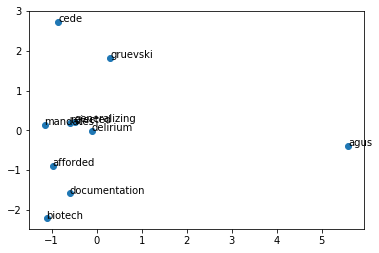